In [1]:
import time
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
from urllib.request import urlopen 

# stopping the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
print(os.listdir("../breast cancer/data"))

['data.zip']


In [3]:
file = '../breast cancer/data/data.zip'
dat = pd.read_csv(file)

dat.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
dat.apply(lambda x: x.isnull().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
dat[dat.isna().any(axis=1)]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,...,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,NaN
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,...,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,...,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,...,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,...,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,...,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440,NaN
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,...,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,...,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510,NaN
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,...,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,...,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750,NaN


In [8]:
# dropping the the columns since no trace to impute
dat = dat.drop(['Unnamed: 32'], axis = 1)

In [9]:
# Setting 'id_number' as our index
dat.set_index(['id'], inplace = True) 
dat.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
# Converted to binary to help later on with models and plots
dat['diagnosis'] = dat['diagnosis'].map({'M':1, 'B':0})
dat.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
print("the data has {} of samples".format(dat.shape[0]) )

the data has 569 of samples


In [15]:
def calulate_perc(data_frame, col):
    col_vals = data_frame[col].value_counts().reset_index()

    # If the number of unique instances in column exceeds 20 print warning
    if len(col_vals['index']) > 20:
        print('Warning: values in column are more than 20 \nPlease try a column with lower value counts!')
    # Else it calculates/prints percentage for each unique value in column
    else:
        # Create a function to output the percentage
        f = lambda x, y: 100 * (x / sum(y))
        for i in range(0, len(col_vals['index'])):
            print('{0} accounts for {1:.2f}% of the {2} column'\
                .format(col_vals['index'][i],
                        f(col_vals[col].iloc[i],
                        col_vals[col]),
                        col))

In [18]:
calulate_perc(dat, 'diagnosis')

0 accounts for 62.74% of the diagnosis column
1 accounts for 37.26% of the diagnosis column


In [19]:
dat.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


the maximum row of the chart that our data varies in distribution; this will be important as we consider classification models. Standardization is an important requirement for many classification models that should be handled when implementing pre-processing.

Try Scaling the variables

In [36]:
from sklearn import preprocessing

dat_norm = pd.DataFrame(preprocessing.scale(dat))

### Train/Test sets

In [22]:
X = dat.drop(['diagnosis'], axis = 1)
y = dat['diagnosis']

# use train/test split with different random_state values
# the scores change a lot, this is why testing scores is a high-variance estimate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


###  Random Forest Model

In [32]:
rf = RandomForestClassifier()

In [70]:
toc = time.time()

param_dist = {'max_depth': [2, 3, 4],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(X_train, y_train)
print('Best Parameters using grid search: \n', 
      cv_rf.best_params_)
tic = time.time()
print('Time taken in grid search: {0: .2f}'.format(tic - toc))

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 4, 'max_features': None}
Time taken in grid search:  180.34


In [40]:
# set best parameters given by grid search
rf.set_params(criterion = 'entropy',
                  max_features = 'auto', 
                  max_depth = 4)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Out of Bag Error Rate (OOB)
Utilizing the OOB error rate that was created with the model gives us an unbiased error rate. Since OOB can be calculated with the model estimation, it's helpful when cross validating and/or optimizing hyperparameters prove to be too computationally expensive.

In [46]:
toc = time.time()
rf.set_params(warm_start=False, 
              oob_score=True)

min_estimators = 15
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    rf.set_params(n_estimators=i)
    rf.fit(X_train, y_train)

    oob_error = 1 - rf.oob_score_
    error_rate[i] = oob_error

tic = time.time()
print('Time taken in oob : {0: .2f}'.format(tic - toc))

Time taken in oob :  554.02


In [48]:
# Convert dictionary to a pandas series for easy plotting 
oob_series = pd.Series(error_rate)

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

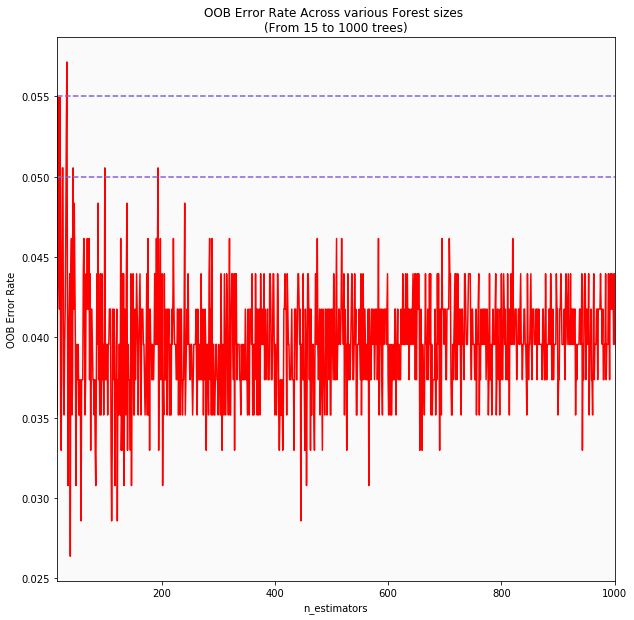

In [49]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',
                color = 'red')
plt.axhline(0.055, 
            color='#875FDB',
           linestyle='--')
plt.axhline(0.05, 
            color='#875FDB',
           linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

In [50]:
print('OOB Error rate for 400 trees is: {0:.5f}'.format(oob_series[400]))

OOB Error rate for 400 trees is: 0.03516


### Traditional Training and Test Set Split

In [51]:
rf.set_params(n_estimators=400,
                  bootstrap = True,
                  warm_start=False, 
                  oob_score=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Training Alogorithm

In [52]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

###  Variable Importance
One downside of using ensemble methods with decision trees is loss of the interpretability a single tree gives. A single tree can outline for us important node splits based on either gini or entropy.

Yet, sincce RF rely on CART models uses metric to evaluate the homogeneity of splits, I can still look for the important variables used in training of the model

In [53]:
def variable_importance(fit):
    try:
        if not hasattr(fit, 'fit'):
            return print("'{0}' is not an instantiated model from scikit-learn".format(fit)) 

        # Captures whether the model has been trained
        if not vars(fit)["estimators_"]:
            return print("Model does not appear to be trained.")
    except KeyError:
        print("Model entered does not contain 'estimators_' attribute.")

    importances = fit.feature_importances_
    indices = np.argsort(importances)[::-1]
    return {'importance': importances,
            'index': indices}

In [55]:
def print_var_importance(importance, indices, name_index):
    print("Feature ranking:")

    for f in range(0, indices.shape[0]):
        i = f
        print("{0}. The feature '{1}' has a Mean Decrease in Impurity of {2:.5f}"
              .format(f + 1,
                      names_index[indices[i]],
                      importance[indices[f]]))

In [63]:
def variable_importance_plot(importance, indices, name_index):
    index = np.arange(len(names_index))

    importance_desc = sorted(importance)
    feature_space = []
    for i in range(indices.shape[0] - 1, -1, -1):
        feature_space.append(names_index[indices[i]])

    fig, ax = plt.subplots(figsize=(10, 10))

    #ax.set_axis_bgcolor('#fafafa')
    plt.title('Feature importances for Random Forest Model\
    \nBreast Cancer (Diagnostic)')
    plt.barh(index,
             importance_desc,
             align="center",
             color = '#875FDB')
    plt.yticks(index,
               feature_space)

    plt.ylim(-1, 30)
    plt.xlim(0, max(importance_desc) + 0.01)
    plt.xlabel('Mean Decrease in Impurity')
    plt.ylabel('Feature')

    plt.show()
    plt.close()

In [58]:
var_imp_rf = variable_importance(rf)

importances_rf = var_imp_rf['importance']

indices_rf = var_imp_rf['index']


In [59]:
names = ['id', 'diagnosis', 'radius_mean', 
         'texture_mean', 'perimeter_mean', 'area_mean', 
         'smoothness_mean', 'compactness_mean', 
         'concavity_mean','concave_points_mean', 
         'symmetry_mean', 'fractal_dimension_mean',
         'radius_se', 'texture_se', 'perimeter_se', 
         'area_se', 'smoothness_se', 'compactness_se', 
         'concavity_se', 'concave_points_se', 
         'symmetry_se', 'fractal_dimension_se', 
         'radius_worst', 'texture_worst', 
         'perimeter_worst', 'area_worst', 
         'smoothness_worst', 'compactness_worst', 
         'concavity_worst', 'concave_points_worst', 
         'symmetry_worst', 'fractal_dimension_worst']

names_index = names[2:]

In [64]:
print_var_importance(importances_rf, indices_rf, names_index)

Feature ranking:
1. The feature 'perimeter_worst' has a Mean Decrease in Impurity of 0.16000
2. The feature 'area_worst' has a Mean Decrease in Impurity of 0.13466
3. The feature 'concave_points_worst' has a Mean Decrease in Impurity of 0.11082
4. The feature 'concave_points_mean' has a Mean Decrease in Impurity of 0.09587
5. The feature 'radius_worst' has a Mean Decrease in Impurity of 0.09029
6. The feature 'area_mean' has a Mean Decrease in Impurity of 0.06375
7. The feature 'perimeter_mean' has a Mean Decrease in Impurity of 0.04670
8. The feature 'area_se' has a Mean Decrease in Impurity of 0.04499
9. The feature 'concavity_worst' has a Mean Decrease in Impurity of 0.04174
10. The feature 'radius_mean' has a Mean Decrease in Impurity of 0.03566
11. The feature 'concavity_mean' has a Mean Decrease in Impurity of 0.02724
12. The feature 'texture_worst' has a Mean Decrease in Impurity of 0.01935
13. The feature 'compactness_worst' has a Mean Decrease in Impurity of 0.01902
14. The fe

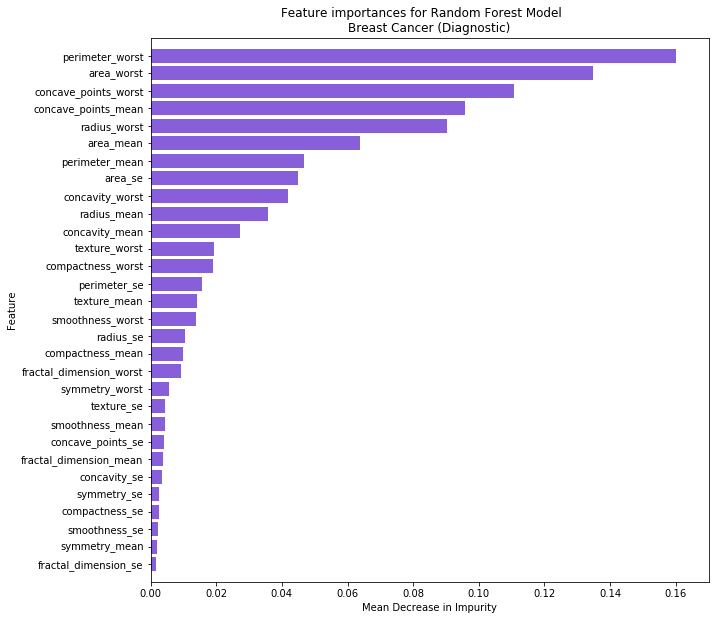

In [65]:
variable_importance_plot(importances_rf, indices_rf, names_index)

###  Cross Validation

Using cross validation, one can create multiple training and test sets and average the scores to give us a less biased metric.

Here, I will create 10 sets that calcualted the estimations already, then average the prediction error to get better accuracy. 

Note: if data set is significantly large, cross validation may not be needed. Instead, using the OOB error rate as an unbiased metric for computational costs.

In [81]:
def cross_val_metrics(fit, X_train, y_train, estimator, print_results = True):
    
    my_estimators = {
    'rf': 'estimators_',
    'nn': 'out_activation_',
    'knn': '_fit_method'
    }
    try:
        # Captures whether first parameter is a model
        if not hasattr(fit, 'fit'):
            return print("'{0}' is not an instantiated model from scikit-learn".format(fit)) 

        # Captures whether the model has been trained
        if not vars(fit)[my_estimators[estimator]]:
            return print("Model does not appear to be trained.")

    except KeyError as e:
        print("'{0}' does not correspond with the appropriate key inside the estimators dictionary. \
\nPlease refer to function to check `my_estimators` dictionary.".format(estimator))
        raise

    n = KFold(n_splits=10)
    scores = cross_val_score(fit, 
                         X_train, 
                         y_train, 
                         cv = n)
    if print_results:
        for i in range(0, len(scores)):
            print("Cross validation run {0}: {1: 0.3f}".format(i, scores[i]))
            print("Accuracy: {0: 0.3f} (+/- {1: 0.3f})"\
              .format(scores.mean(), scores.std() / 2))
    else:
        return scores.mean(), scores.std() / 2

In [82]:
cross_val_metrics(rf, 
                  X_train, 
                  y_train, 
                  'rf',
                  print_results = True)

Cross validation run 0:  0.978
Cross validation run 1:  0.935
Cross validation run 2:  0.978
Cross validation run 3:  0.978
Cross validation run 4:  1.000
Cross validation run 5:  0.956
Cross validation run 6:  0.978
Cross validation run 7:  0.911
Cross validation run 8:  0.911
Cross validation run 9:  0.978
Accuracy:  0.960 (+/-  0.015)


In [80]:
y_pred = rf.predict(X_test)

In [83]:
def create_conf_mat(y_test, predictions):
    if (len(y_test.shape) != len(predictions.shape) == 1):
        return print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets.')
    elif (y_test.shape != predictions.shape):
        return print('Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances.')
    else:
        # Set Metrics
        test_crosstb_comp = pd.crosstab(index = y_test,
                                        columns = predictions)
        # Changed for Future deprecation of as_matrix
        test_crosstb = test_crosstb_comp.values
        return test_crosstb

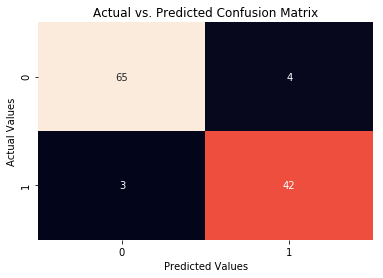

In [84]:
conf_mat = create_conf_mat(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

In [85]:
accuracy_rf = rf.score(X_test, y_test)
print("Here is our mean accuracy on the test set:\n {0:.3f}"\
      .format(accuracy_rf))

Here is our mean accuracy on the test set:
 0.939


In [86]:
test_error_rate_rf = 1 - accuracy_rf
print("The test error rate for our model is:\n {0: .4f}"\
      .format(test_error_rate_rf))

The test error rate for our model is:
  0.0614


In [91]:
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
auc = auc(fpr, tpr)

print(rf.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(rf.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(rf.__class__.__name__+" auc is %2.3f" % auc)

RandomForestClassifier accuracy is 0.939
RandomForestClassifier log_loss is 0.158
RandomForestClassifier auc is 0.986


In [90]:
def plot_roc_curve(fpr, tpr, auc, estimator, xlim=None, ylim=None):
    my_estimators = {'knn': ['Kth Nearest Neighbor', 'deeppink'],
              'rf': ['Random Forest', 'red'],
              'nn': ['Neural Network', 'purple']}

    try:
        plot_title = my_estimators[estimator][0]
        color_value = my_estimators[estimator][1]
    except KeyError as e:
        print("'{0}' does not correspond with the appropriate key inside the estimators dictionary. \
\nPlease refer to function to check `my_estimators` dictionary.".format(estimator))
        raise

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_facecolor('#fafafa')

    plt.plot(fpr, tpr,
             color=color_value,
             linewidth=1)
    plt.title('ROC Curve For {0} (AUC = {1: 0.3f})'\
              .format(plot_title, auc))

    plt.plot([0, 1], [0, 1], 'k--', lw=2) # Add Diagonal line
    plt.plot([0, 0], [1, 0], 'k--', lw=2, color = 'black')
    plt.plot([1, 0], [1, 1], 'k--', lw=2, color = 'black')
    if xlim is not None:
        plt.xlim(*xlim)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    plt.close()

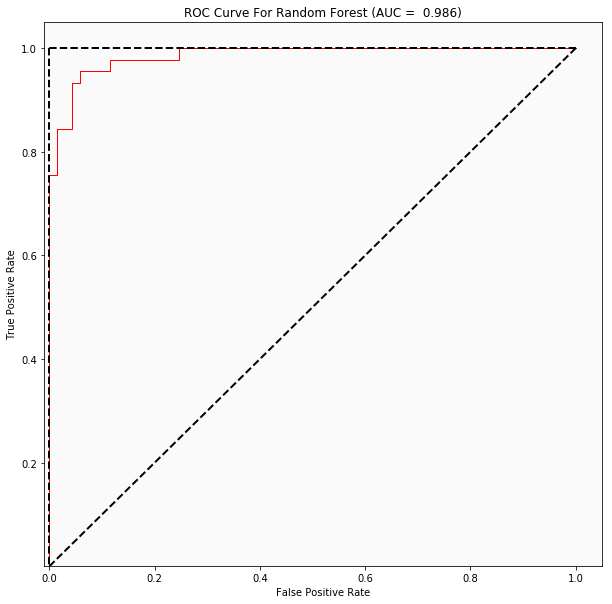

In [92]:
plot_roc_curve(fpr, tpr, auc, 'rf',
               xlim=(-0.01, 1.05), 
               ylim=(0.001, 1.05))



In [93]:
def print_class_report(predictions, target, alg_name):
    
    print('Classification Report for {0}:'.format(alg_name))
    print(classification_report(predictions, 
            y_test, 
            target_names = target))

In [95]:
print_class_report(y_pred, target = ['Benign', 'Malignant'], alg_name = 'RandomFrost')

Classification Report for RandomFrost:
              precision    recall  f1-score   support

      Benign       0.94      0.96      0.95        68
   Malignant       0.93      0.91      0.92        46

   micro avg       0.94      0.94      0.94       114
   macro avg       0.94      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114

